In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
tf.__version__

'1.14.0'

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = (x_train / 255).reshape(x_train.shape[0], 28, 28, 1)
x_test = (x_test / 255).reshape(x_test.shape[0], 28, 28, 1)

In [4]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(5,5)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(1024, activation=tf.nn.relu),
    layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

model.fit(
    x_train,
    y_train,
    epochs=2
)

W0910 12:06:33.560520  7432 deprecation.py:506] From C:\Users\Sveinung\Anaconda3\envs\mlTensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 3s 305us/sample - loss: 0.0661 - acc: 0.9809
Test accuracy: 0.9809
Test loss: 0.0660753759622341


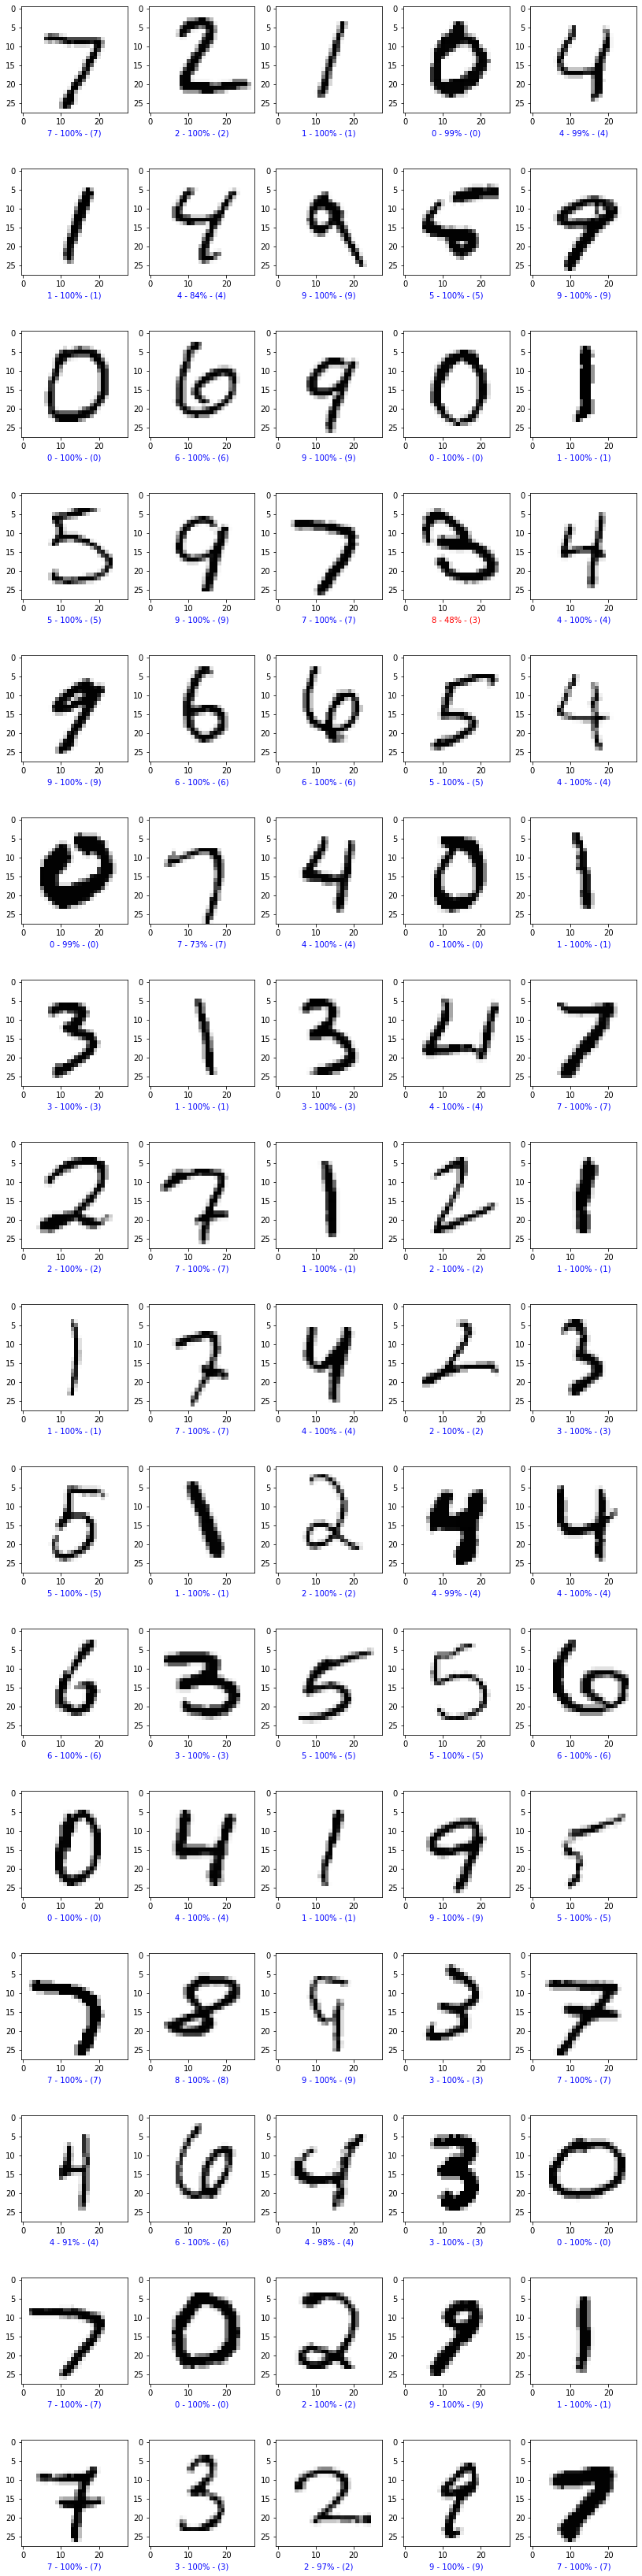

In [8]:
plt.figure(figsize=(14, 60))
predictions = model.predict(x_test[:80])
for i in range(80):
    plt.subplot(16, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='Greys')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} - {:2.0f}% - ({})".format(predicted_label,
                                        100*np.max(predictions[i]),
                                        true_label),
              color=color)
plt.show()